# Modeling California public high school graduation rates in the year 2009-2010

In [9]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
import pickle as pkl

## The data

### Student demographics (gender, ethnicity) and highschool graduation rates obtained from California Department of Education.

### Finding the data

https://www.cde.ca.gov/ds/sd/sd/filesncesrate.asp  *

https://www.cde.ca.gov/ds/sd/sd/filesenr.asp

>*NCES graduation rate*. The usage of this rate is the result of negotiations with the U.S. Department of Education and is required for No Child Left Behind (NCLB) reporting. Since this rate is calculated using comparable data (both school-level dropout and graduate counts are cumulative year-end summary data), the rate will never exceed 100 percent even in schools with increasing or declining enrollments. Therefore this rate may be used at the school-level. This calculation overstates the graduation rate since the difference between ninth grade enrollment and graduates and dropouts is not accounted for.

>Formula: Number of graduates from year 4 (GRADS) divided by number of graduates from year 4 (GRADS) + grade nine dropouts from year 1 (D9) + grade ten dropouts from year 2 (D10) + grade eleven dropouts from year 3 (D11) + grade twelve dropouts from year 4 (D12). 

#### Reading in graduation rates data as a pandas date frame

In [10]:
df_gdrate = pd.read_table('/Users/sheenaschier/Documents/Workdir/datasets/filesncesrate.txt')
df_gdrate.head(10)

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,D9,D10,D11,D12,GRADS,GRADRATE,YEAR
0,0,State Total,State Total,State Total,17375,15168,23395,42078,405087,80.5,910
1,1000000000000,Alameda,County Total,County Total,631,470,738,1448,13926,80.9,910
2,1100170000000,Alameda,Alameda County Office of Education,District Total,46,102,122,132,139,25.7,910
3,1100170109835,Alameda,Alameda County Office of Education,FAME Public Charter,12,3,4,3,54,71.1,910
4,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,6,1,4,0,26,70.3,910
5,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,0,0,0,0,0,0.0,910
6,1100170130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,21,62,83,102,3,1.1,910
7,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,3,19,24,20,34,34.0,910
8,1100170130427,Alameda,Alameda County Office of Education,Alameda County Opportunity,4,17,7,7,22,38.6,910
9,1316090000000,Alameda,California School for the Blind (State Special...,District Total,0,0,0,0,0,0.0,910


#### Reading in enrollment data as a pandas date frame

In [11]:
df_enr = pd.read_table('/Users/sheenaschier/Documents/Workdir/datasets/filesenr.0910.txt')

df_enr.head(10)

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,ETHNIC,GENDER,KDGN,GR_1,GR_2,GR_3,GR_4,GR_5,GR_6,GR_7,GR_8,UNGR_ELM,GR_9,GR_10,GR_11,GR_12,UNGR_SEC,ENR_TOTAL,ADULT
0,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,6,M,3,0,3,2,1,0,0,0,0,0,0,0,0,0,0,9,0
1,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,4,F,1,3,4,2,4,1,0,0,0,0,0,0,0,0,0,15,0
2,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,3,F,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,3,0
3,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,7,F,23,43,33,30,41,33,0,0,0,0,0,0,0,0,0,203,0
4,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,1,F,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,4,0
5,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,2,F,4,4,3,6,4,3,0,0,0,0,0,0,0,0,0,24,0
6,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,5,M,9,21,13,20,13,9,0,0,0,0,0,0,0,0,0,85,0
7,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,1,M,0,2,2,0,2,0,0,0,0,0,0,0,0,0,0,6,0
8,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,9,M,0,5,3,1,1,0,0,0,0,0,0,0,0,0,0,10,0
9,7617546004097,Contra Costa,Mt. Diablo Unified,Hidden Valley Elementary,6,F,2,0,3,1,9,1,0,0,0,0,0,0,0,0,0,16,0


#### Ethnicity codes
* Code 0 = Not reported
* Code 1 = American Indian or Alaska Native, Not Hispanic
* Code 2 = Asian, Not Hispanic
* Code 3 = Pacific Islander, Not Hispanic
* Code 4 = Filipino, Not Hispanic
* Code 5 = Hispanic or Latino
* Code 6 = African American, not Hispanic
* Code 7 = White, not Hispanic
* Code 9 = Two or More Races, Not Hispanic


In [12]:
df_gdrate.shape, df_gdrate.dtypes

((7543, 11), CDS_CODE      int64
 COUNTY       object
 DISTRICT     object
 SCHOOL       object
 D9            int64
 D10           int64
 D11           int64
 D12           int64
 GRADS         int64
 GRADRATE    float64
 YEAR          int64
 dtype: object)

In [13]:
df_enr.shape, df_enr.dtypes

((124714, 23), CDS_CODE      int64
 COUNTY       object
 DISTRICT     object
 SCHOOL       object
 ETHNIC        int64
 GENDER       object
 KDGN          int64
 GR_1          int64
 GR_2          int64
 GR_3          int64
 GR_4          int64
 GR_5          int64
 GR_6          int64
 GR_7          int64
 GR_8          int64
 UNGR_ELM      int64
 GR_9          int64
 GR_10         int64
 GR_11         int64
 GR_12         int64
 UNGR_SEC      int64
 ENR_TOTAL     int64
 ADULT         int64
 dtype: object)

### Cleaning the data, adding new features, and saving the new pandas Dataframe as a .csv 

#### Creating a boolean *high school* mask and adding it to the dataframe for filtering later. 

In [14]:
highschool_mask = ((df_gdrate['GRADRATE'] >0.0)&(df_gdrate['SCHOOL'] !='District Total')&(df_gdrate['SCHOOL'] !='State Total')&(df_gdrate['SCHOOL'] !='County Total'))
df_gdrate['highschool'] = (highschool_mask)
df_gdrate.head(10)

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,D9,D10,D11,D12,GRADS,GRADRATE,YEAR,highschool
0,0,State Total,State Total,State Total,17375,15168,23395,42078,405087,80.5,910,False
1,1000000000000,Alameda,County Total,County Total,631,470,738,1448,13926,80.9,910,False
2,1100170000000,Alameda,Alameda County Office of Education,District Total,46,102,122,132,139,25.7,910,False
3,1100170109835,Alameda,Alameda County Office of Education,FAME Public Charter,12,3,4,3,54,71.1,910,True
4,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,6,1,4,0,26,70.3,910,True
5,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,0,0,0,0,0,0.0,910,False
6,1100170130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,21,62,83,102,3,1.1,910,True
7,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,3,19,24,20,34,34.0,910,True
8,1100170130427,Alameda,Alameda County Office of Education,Alameda County Opportunity,4,17,7,7,22,38.6,910,True
9,1316090000000,Alameda,California School for the Blind (State Special...,District Total,0,0,0,0,0,0.0,910,False


#### Creating variables for selecting rows based on gender and ethnicity.

In [15]:
female = df_enr['GENDER'] == 'F'
male = df_enr['GENDER'] == 'M'
ethnic_not_reported = df_enr['ETHNIC'] == 0
ethnic_asian = df_enr['ETHNIC'] == 1
ethnic_native = df_enr['ETHNIC'] == 2
ethnic_pacific_islander = df_enr['ETHNIC'] == 3
ethnic_filipino = df_enr['ETHNIC'] == 4
ethnic_hispanic = df_enr['ETHNIC'] == 5
ethnic_african_american = df_enr['ETHNIC'] == 6
ethnic_white = df_enr['ETHNIC'] == 7
ethnic_multi = df_enr['ETHNIC'] == 9

#### Creating separate data frames for each category of gender and ethnicity combination.  Each df should have one entry for each cds_code in df_enr.

##### Also, taking this opportunity to drop extraneous columns from df_enr (everthing but school information, ethnicity, gender, and total enrolled for each eth-gen combinaiton).

In [16]:
df_female_not = df_enr[(female) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_not = df_enr[(male) & (ethnic_not_reported)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])
                                                                   
df_female_asi = df_enr[(female) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_asi = df_enr[(male) & (ethnic_asian)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_female_nat = df_enr[(female) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_nat = df_enr[(male) & (ethnic_native)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_female_pac = df_enr[(female) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_pac = df_enr[(male) & (ethnic_pacific_islander)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_female_fil = df_enr[(female) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_fil = df_enr[(male) & (ethnic_filipino)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_female_his = df_enr[(female) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_his = df_enr[(male) & (ethnic_hispanic)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])   

df_female_afr = df_enr[(female) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])

df_male_afr = df_enr[(male) & (ethnic_african_american)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])
                                                                   
df_female_whi = df_enr[(female) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])
                                                                   
df_male_whi = df_enr[(male) & (ethnic_white)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])     
                                                                   
df_female_mul = df_enr[(female) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])
                                                                   
df_male_mul = df_enr[(male) & (ethnic_multi)].drop(columns=['KDGN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'UNGR_ELM', 'UNGR_SEC', 'GR_9', 'GR_10', 'GR_11', 'GR_12', 'ADULT'])  

#### Joining all the eth-gen data frames with unique suffixes to get df with one row per cds_code.

In [17]:
not_join = pd.merge(df_female_not, df_male_not, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_not', '_m_not'))
asi_join = pd.merge(df_female_asi, df_male_asi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_asi', '_m_asi'))
nat_join = pd.merge(df_female_nat, df_male_nat, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_nat', '_m_nat'))
pac_join = pd.merge(df_female_pac, df_male_pac, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_pac', '_m_pac'))
fil_join = pd.merge(df_female_fil, df_male_fil, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_fil', '_m_fil'))
his_join = pd.merge(df_female_his, df_male_his, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_his', '_m_his'))
afr_join = pd.merge(df_female_afr, df_male_afr, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_afr', '_m_afr'))
whi_join = pd.merge(df_female_whi, df_male_whi, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_whi', '_m_whi'))
mul_join = pd.merge(df_female_mul, df_male_mul, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer', suffixes=('_f_mul', '_m_mul'))

join_1 = pd.merge(not_join, asi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')   
join_2 = pd.merge(join_1, nat_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_3 = pd.merge(join_2, pac_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
join_4 = pd.merge(join_3, fil_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_5 = pd.merge(join_4, his_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')                                                            
join_6 = pd.merge(join_5, afr_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_7 = pd.merge(join_6, whi_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')
join_8 = pd.merge(join_7, mul_join, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')    

#### Joining new df with df_gdrate.

In [18]:
rate_join = pd.merge(df_gdrate, join_8, on=['CDS_CODE', 'DISTRICT', 'COUNTY', 'SCHOOL'], how='outer')

#### Setting all *NaN* entries to 0 so I can perform arithmetic functions.

#### Adding new features for enrollment totals and ratios based on ethnicity and gender.

In [19]:
enr_grad = rate_join.fillna(value=0)
enr_grad['enr_afr'] = enr_grad.ENR_TOTAL_f_afr+enr_grad.ENR_TOTAL_m_afr
enr_grad['enr_asi'] = enr_grad.ENR_TOTAL_f_asi+enr_grad.ENR_TOTAL_m_asi
enr_grad['enr_fil'] = enr_grad.ENR_TOTAL_f_fil+enr_grad.ENR_TOTAL_m_fil
enr_grad['enr_his'] = enr_grad.ENR_TOTAL_f_his+enr_grad.ENR_TOTAL_m_his
enr_grad['enr_mul'] = enr_grad.ENR_TOTAL_f_mul+enr_grad.ENR_TOTAL_m_mul
enr_grad['enr_nat'] = enr_grad.ENR_TOTAL_f_nat+enr_grad.ENR_TOTAL_m_nat
enr_grad['enr_not'] = enr_grad.ENR_TOTAL_f_not+enr_grad.ENR_TOTAL_m_not
enr_grad['enr_pac'] = enr_grad.ENR_TOTAL_f_pac+enr_grad.ENR_TOTAL_m_pac
enr_grad['enr_whi'] = enr_grad.ENR_TOTAL_f_whi+enr_grad.ENR_TOTAL_m_whi
enr_grad['enr_tot'] = enr_grad.enr_afr+enr_grad.enr_asi+enr_grad.enr_fil+enr_grad.enr_his+enr_grad.enr_nat+enr_grad.enr_not+enr_grad.enr_pac+enr_grad.enr_whi

In [20]:
enr_grad['afr_f_ratio'] = enr_grad.ENR_TOTAL_f_afr/enr_grad.enr_tot
enr_grad['afr_m_ratio'] = enr_grad.ENR_TOTAL_m_afr/enr_grad.enr_tot
enr_grad['asi_f_ratio'] = enr_grad.ENR_TOTAL_f_asi/enr_grad.enr_tot
enr_grad['asi_m_ratio'] = enr_grad.ENR_TOTAL_m_asi/enr_grad.enr_tot
enr_grad['fil_f_ratio'] = enr_grad.ENR_TOTAL_f_fil/enr_grad.enr_tot
enr_grad['fil_m_ratio'] = enr_grad.ENR_TOTAL_m_fil/enr_grad.enr_tot
enr_grad['his_f_ratio'] = enr_grad.ENR_TOTAL_f_his/enr_grad.enr_tot
enr_grad['his_m_ratio'] = enr_grad.ENR_TOTAL_m_his/enr_grad.enr_tot
enr_grad['nat_f_ratio'] = enr_grad.ENR_TOTAL_f_nat/enr_grad.enr_tot
enr_grad['nat_m_ratio'] = enr_grad.ENR_TOTAL_m_nat/enr_grad.enr_tot
enr_grad['not_f_ratio'] = enr_grad.ENR_TOTAL_f_not/enr_grad.enr_tot
enr_grad['not_m_ratio'] = enr_grad.ENR_TOTAL_m_not/enr_grad.enr_tot
enr_grad['pac_f_ratio'] = enr_grad.ENR_TOTAL_f_pac/enr_grad.enr_tot
enr_grad['pac_m_ratio'] = enr_grad.ENR_TOTAL_m_pac/enr_grad.enr_tot
enr_grad['whi_f_ratio'] = enr_grad.ENR_TOTAL_f_whi/enr_grad.enr_tot
enr_grad['whi_m_ratio'] = enr_grad.ENR_TOTAL_m_whi/enr_grad.enr_tot
enr_grad['mul_f_ratio'] = enr_grad.ENR_TOTAL_f_mul/enr_grad.enr_tot
enr_grad['mul_m_ratio'] = enr_grad.ENR_TOTAL_m_mul/enr_grad.enr_tot

In [21]:
enr_grad = enr_grad.fillna(value=0)
enr_grad.head(10)

,CDS_CODE,COUNTY,DISTRICT,SCHOOL,D9,D10,D11,D12,GRADS,GRADRATE,YEAR,highschool,ETHNIC_f_not,GENDER_f_not,ENR_TOTAL_f_not,ETHNIC_m_not,GENDER_m_not,ENR_TOTAL_m_not,ETHNIC_f_asi,GENDER_f_asi,ENR_TOTAL_f_asi,ETHNIC_m_asi,GENDER_m_asi,ENR_TOTAL_m_asi,ETHNIC_f_nat,...,enr_his,enr_mul,enr_nat,enr_not,enr_pac,enr_whi,enr_tot,afr_f_ratio,afr_m_ratio,asi_f_ratio,asi_m_ratio,fil_f_ratio,fil_m_ratio,his_f_ratio,his_m_ratio,nat_f_ratio,nat_m_ratio,not_f_ratio,not_m_ratio,pac_f_ratio,pac_m_ratio,whi_f_ratio,whi_m_ratio,mul_f_ratio,mul_m_ratio
0,0,State Total,State Total,State Total,17375.0,15168.0,23395.0,42078.0,405087.0,80.5,910.0,False,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,1000000000000,Alameda,County Total,County Total,631.0,470.0,738.0,1448.0,13926.0,80.9,910.0,False,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,1100170000000,Alameda,Alameda County Office of Education,District Total,46.0,102.0,122.0,132.0,139.0,25.7,910.0,False,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,1100170109835,Alameda,Alameda County Office of Education,FAME Public Charter,12.0,3.0,4.0,3.0,54.0,71.1,910.0,True,0.0,F,23.0,0.0,M,18.0,1.0,F,2.0,1.0,M,4.0,2.0,...,179.0,0.0,282.0,41.0,29.0,731.0,1439.0,0.046560,0.054899,0.001390,0.002780,0.010424,0.006949,0.074357,0.050035,0.096595,0.099375,0.015983,0.012509,0.009729,0.010424,0.271022,0.236970,0.000000,0.00000
4,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,6.0,1.0,4.0,0.0,26.0,70.3,910.0,True,0.0,0,0.0,0.0,M,2.0,1.0,F,1.0,1.0,M,1.0,2.0,...,57.0,1.0,3.0,2.0,1.0,13.0,247.0,0.348178,0.323887,0.004049,0.004049,0.004049,0.008097,0.089069,0.141700,0.008097,0.004049,0.000000,0.008097,0.000000,0.004049,0.024291,0.028340,0.004049,0.00000
5,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,0.0,0.0,0.0,0.0,0.0,0.0,910.0,False,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,2.0,...,88.0,1.0,2.0,0.0,0.0,1.0,195.0,0.307692,0.210256,0.000000,0.000000,0.005128,0.010256,0.215385,0.235897,0.010256,0.000000,0.000000,0.000000,0.000000,0.000000,0.005128,0.000000,0.005128,0.00000
6,1100170130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,21.0,62.0,83.0,102.0,3.0,1.1,910.0,True,0.0,F,2.0,0.0,M,6.0,0.0,0,0.0,1.0,M,7.0,0.0,...,69.0,3.0,8.0,8.0,6.0,19.0,246.0,0.089431,0.434959,0.000000,0.028455,0.000000,0.000000,0.024390,0.256098,0.000000,0.032520,0.008130,0.024390,0.000000,0.024390,0.016260,0.060976,0.004065,0.00813
7,1100170130419,Alameda,Alameda County Office of Education,Alameda County Community,3.0,19.0,24.0,20.0,34.0,34.0,910.0,True,0.0,F,4.0,0.0,M,10.0,1.0,F,1.0,1.0,M,1.0,2.0,...,92.0,0.0,8.0,14.0,4.0,29.0,200.0,0.070000,0.170000,0.005000,0.005000,0.000000,0.015000,0.125000,0.335000,0.005000,0.035000,0.020000,0.050000,0.010000,0.010000,0.025000,0.120000,0.000000,0.00000
8,1100170130427,Alameda,Alameda County Office of Education,Alameda County Opportunity,4.0,17.0,7.0,7.0,22.0,38.6,910.0,True,0.0,F,14.0,0.0,0,0.0,0.0,0,0.0,1.0,M,1.0,0.0,...,55.0,0.0,0.0,14.0,0.0,0.0,89.0,0.213483,0.000000,0.000000,0.011236,0.000000,0.000000,0.595506,0.022472,0.000000,0.000000,0.157303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,1316090000000,Alameda,California School for the Blind (State Special...,District Total,0.0,0.0,0.0,0.0,0.0,0.0,910.0,False,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

#### Looking at distribution of graduation rate for all useful entries.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'CA high school graduation rate [%]')

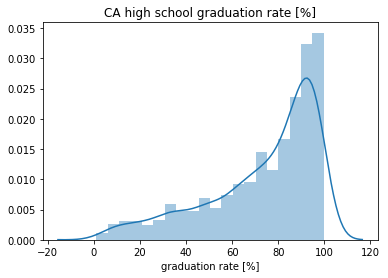

In [22]:
sns.distplot(enr_grad[(enr_grad['highschool'] == True) & (enr_grad['enr_tot']>0.0)].GRADRATE)
plt.xlabel('graduation rate [%]')
plt.title('CA high school graduation rate [%]')

#### Writing out date frame to .csv file 

In [23]:
enr_grad.to_csv('datasets/ENR_GRD.csv', index=False)

#### Reading *ENR_GRD.csv* and start new data frame

In [24]:
df = pd.read_csv('/Users/sheenaschier/Documents/Workdir/datasets/ENR_GRD.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df.describe()

,CDS_CODE,D9,D10,D11,D12,GRADS,GRADRATE,YEAR,ETHNIC_f_not,ENR_TOTAL_f_not,ETHNIC_m_not,ENR_TOTAL_m_not,ETHNIC_f_asi,ENR_TOTAL_f_asi,ETHNIC_m_asi,ENR_TOTAL_m_asi,ETHNIC_f_nat,ENR_TOTAL_f_nat,ETHNIC_m_nat,ENR_TOTAL_m_nat,ETHNIC_f_pac,ENR_TOTAL_f_pac,ETHNIC_m_pac,ENR_TOTAL_m_pac,ETHNIC_f_fil,...,enr_his,enr_mul,enr_nat,enr_not,enr_pac,enr_whi,enr_tot,afr_f_ratio,afr_m_ratio,asi_f_ratio,asi_m_ratio,fil_f_ratio,fil_m_ratio,his_f_ratio,his_m_ratio,nat_f_ratio,nat_m_ratio,not_f_ratio,not_m_ratio,pac_f_ratio,pac_m_ratio,whi_f_ratio,whi_m_ratio,mul_f_ratio,mul_m_ratio
count,1.242500e+04,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.0,12425.000000,12425.0,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,...,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,12425.000000,1.242500e+04
mean,2.961640e+13,5.593561,4.883058,7.532153,13.546237,130.410302,16.271984,552.445070,0.0,4.363219,0.0,4.680000,0.464306,1.768612,0.480805,1.846600,1.232032,20.558551,1.265835,21.871469,1.190101,1.441127,1.250463,1.538833,2.066157,...,250.998954,7.796700,42.430020,9.043219,2.979960,134.733682,490.563139,0.027841,0.032619,0.005289,0.007346,0.007717,0.009070,0.181655,0.203750,0.027253,0.029865,0.007965,0.009884,0.002198,0.002644,0.116599,0.145286,0.007268,inf
std,1.447312e+13,173.843421,150.598132,228.102661,395.438326,3824.654215,32.550157,444.460749,0.0,27.608266,0.0,29.224903,0.498744,5.013871,0.499652,5.086594,0.972747,56.295217,0.964057,59.424183,1.467697,3.590487,1.479158,3.689466,1.998986,...,368.500872,19.108108,115.407781,56.702059,7.061067,229.954756,570.834699,0.055558,0.065226,0.025166,0.040915,0.017458,0.022255,0.162363,0.178215,0.056354,0.060956,0.039361,0.050635,0.005297,0.008867,0.135784,0.170723,0.021116,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.964726e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022265,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002681,0.000000,0.000000e+00
50%,3.073635e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,910.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,119.000000,1.000000,5.000000,0.000000,1.000000,38.000000,406.000000,0.007772,0.009091,0.000000,0.000000,0.001312,0.001773,0.149518,0.172805,0.005807,0.006780,0.000000,0.000000,0.000000,0.000000,0.054688,0.075862,0.000000,0.000000e+00
75%,3.968577e+13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,910.000000,0.0,1.000000,0.0,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,16.000000,2.000000,17.000000,3.000000,2.000000,3.000000,2.000000,4.000000,...,363.000000,7.000000,33.000000,2.000000,3.000000,183.000000,672.000000,0.030568,0.034884,0.003317,0.003717,0.008451,0.009852,0.317308,0.351449,0.026846,0.030303,0.002174,0.002519,0.002577,0.002805,0.210526,0.254098,0.007394,8.113590e-03
max

#### Selecting high school entries that contain all the necessary information

In [26]:
highschool = df.highschool == 'True'
enroll = df.enr_tot > 0
df_highschool = df[highschool & enroll].drop(columns=['D9', 'D10', 'D11', 'D12'])

df_highschool.describe()

,CDS_CODE,GRADS,GRADRATE,YEAR,ETHNIC_f_not,ENR_TOTAL_f_not,ETHNIC_m_not,ENR_TOTAL_m_not,ETHNIC_f_asi,ENR_TOTAL_f_asi,ETHNIC_m_asi,ENR_TOTAL_m_asi,ETHNIC_f_nat,ENR_TOTAL_f_nat,ETHNIC_m_nat,ENR_TOTAL_m_nat,ETHNIC_f_pac,ENR_TOTAL_f_pac,ETHNIC_m_pac,ENR_TOTAL_m_pac,ETHNIC_f_fil,ENR_TOTAL_f_fil,ETHNIC_m_fil,ENR_TOTAL_m_fil,ETHNIC_f_his,...,enr_his,enr_mul,enr_nat,enr_not,enr_pac,enr_whi,enr_tot,afr_f_ratio,afr_m_ratio,asi_f_ratio,asi_m_ratio,fil_f_ratio,fil_m_ratio,his_f_ratio,his_m_ratio,nat_f_ratio,nat_m_ratio,not_f_ratio,not_m_ratio,pac_f_ratio,pac_m_ratio,whi_f_ratio,whi_m_ratio,mul_f_ratio,mul_m_ratio
count,1.976000e+03,1976.000000,1976.000000,1976.0,1976.0,1976.000000,1976.0,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,...,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,2.925388e+13,195.317308,73.444534,910.0,0.0,7.081478,0.0,7.599190,0.646255,3.978239,0.673077,4.066802,1.360324,40.205972,1.481781,43.463057,1.571356,3.064777,1.660931,3.136640,2.309717,12.564777,2.459514,13.640182,4.863360,...,468.651822,12.054656,83.669028,14.680668,6.201417,288.916498,968.047065,0.037075,0.043369,0.009072,0.010643,0.007866,0.009485,0.218125,0.254896,0.024066,0.027796,0.008434,0.010124,0.002815,0.003671,0.151930,0.180634,0.006844,0.007992
std,1.460309e+13,210.042067,24.034843,0.0,0.0,47.970761,0.0,50.696059,0.478252,8.494229,0.469208,8.229529,0.933063,101.700616,0.876513,109.229563,1.498681,6.648030,1.491720,6.498027,1.976374,32.837858,1.946989,35.755705,0.815392,...,654.589738,32.100318,210.644909,98.454923,12.887671,424.476288,1032.682315,0.057085,0.067652,0.030025,0.037149,0.016328,0.019208,0.143123,0.164676,0.046347,0.050050,0.037962,0.045990,0.005632,0.014475,0.134179,0.147571,0.015363,0.019929
min,1.100170e+12,1.000000,1.100000,910.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.964525e+13,24.000000,60.300000,910.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,43.750000,0.000000,1.000000,0.000000,0.000000,18.000000,116.000000,0.003800,0.005259,0.000000,0.000000,0.000000,0.000000,0.101204,0.115630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033291,0.050000,0.000000,0.000000
50%,3.066621e+13,89.000000,82.300000,910.0,0.0,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.000000,4.000000,1.000000,4.000000,2.000000,5.000000,...,177.000000,1.000000,7.000000,0.000000,2.000000,81.500000,417.500000,0.015504,0.019183,0.001788,0.002222,0.002436,0.003252,0.201911,0.237486,0.007804,0.010013,0.000000,0.000000,0.000559,0.000835,0.117262,0.147884,0.000386,0.000607
75%,3.868478e+13,357.000000,92.700000,910.0,0.0,2.000000,0.0,2.000000,1.000000,5.000000,1.000000,5.000000,2.000000,30.000000,2.000000,32.000000,3.000000,3.000000,3.000000,4.000000,4.000000,11.000000,4.000000,11.000000,5.000000,...,624.500000,9.000000,64.250000,4.000000,7.000000,391.000000,1818.750000,0.046616,0.053047,0.005705,0.006462,0.009354,0.011037,0.317907,0.379686,0.025000,0.030861,0.002812,0.003962,0.003434,0.003829,0.251727,0.289214,0.007011,0.007905
max,5.872770e+13,1005.000000,99.800

#### Creating new df of target variable and feature variables

In [27]:
df_play = df_highschool[['GRADRATE', 'whi_f_ratio', 'whi_m_ratio', 'afr_f_ratio', 'afr_m_ratio', 'his_f_ratio', 'his_m_ratio', 'asi_f_ratio', 'asi_m_ratio', 'nat_f_ratio', 'nat_m_ratio', 'pac_f_ratio', 'pac_m_ratio', 'fil_f_ratio', 'fil_m_ratio', 'not_f_ratio', 'not_m_ratio', 'mul_f_ratio', 'mul_m_ratio']]
df_play.describe()                   

,GRADRATE,whi_f_ratio,whi_m_ratio,afr_f_ratio,afr_m_ratio,his_f_ratio,his_m_ratio,asi_f_ratio,asi_m_ratio,nat_f_ratio,nat_m_ratio,pac_f_ratio,pac_m_ratio,fil_f_ratio,fil_m_ratio,not_f_ratio,not_m_ratio,mul_f_ratio,mul_m_ratio
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,73.444534,0.151930,0.180634,0.037075,0.043369,0.218125,0.254896,0.009072,0.010643,0.024066,0.027796,0.002815,0.003671,0.007866,0.009485,0.008434,0.010124,0.006844,0.007992
std,24.034843,0.134179,0.147571,0.057085,0.067652,0.143123,0.164676,0.030025,0.037149,0.046347,0.050050,0.005632,0.014475,0.016328,0.019208,0.037962,0.045990,0.015363,0.019929
min,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.300000,0.033291,0.050000,0.003800,0.005259,0.101204,0.115630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,82.300000,0.117262,0.147884,0.015504,0.019183,0.201911,0.237486,0.001788,0.002222,0.007804,0.010013,0.000559,0.000835,0.002436,0.003252,0.000000,0.000000,0.000386,0.000607
75%,92.700000,0.251727,0.289214,0.046616,0.053047,0.317907,0.379686,0.005705,0.006462,0.025000,0.030861,0.003434,0.003829,0.009354,0.011037,0.002812,0.003962,0.007011,0.007905
max,99.800000,0.800000,0.800000,0.535211,0.821429,1.000000,1.000000,0.500000,0.666667,0.388344,0.440075,0.090909,0.500000,0.206304,0.244126,0.465969,0.909091,0.267782,0.333333


#### Saving cleaned and augmented dataset

In [67]:
df_play.to_csv('datasets/cleaned_CA_enr_grd.csv', index=False)

#### Plotting correlations between target varaibles and feature variables

In [28]:
correlations = df_play.corr()

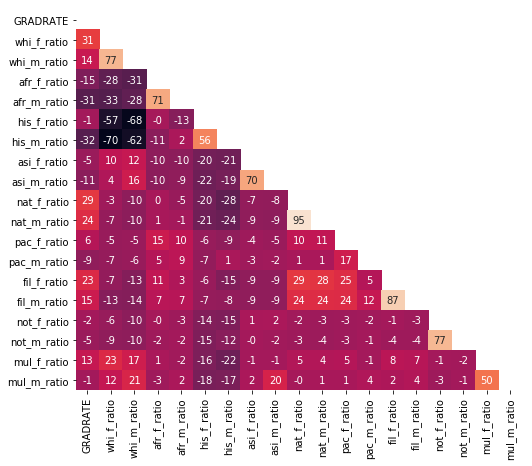

In [29]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,7))

corr_heat = sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask, cbar=False)

### It's time to train some models

In [65]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import Dummy Regressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


#### y = target variable

#### X = feature variables

In [31]:
y = df_play.GRADRATE
X = df_play.drop('GRADRATE', axis=1)

#### Use *train_test_split* to split dataset into train and test groups

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=1234)


print( len(X_train), len(X_test), len(y_train), len(y_test) )

1778 198 1778 198


In [69]:
print(y_train.describe())
y_test.describe()

count    1778.000000
mean       73.256524
std        24.244091
min         1.100000
25%        60.000000
50%        82.200000
75%        92.600000
max        99.800000
Name: GRADRATE, dtype: float64


count    198.000000
mean      75.132828
std       22.052139
min       10.000000
25%       63.300000
50%       82.400000
75%       93.650000
max       98.800000
Name: GRADRATE, dtype: float64

In [70]:
X_train.describe()

,whi_f_ratio,whi_m_ratio,afr_f_ratio,afr_m_ratio,his_f_ratio,his_m_ratio,asi_f_ratio,asi_m_ratio,nat_f_ratio,nat_m_ratio,pac_f_ratio,pac_m_ratio,fil_f_ratio,fil_m_ratio,not_f_ratio,not_m_ratio,mul_f_ratio,mul_m_ratio
count,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000,1778.000000
mean,0.149444,0.178111,0.037883,0.044166,0.219075,0.256390,0.009084,0.010602,0.024210,0.028024,0.002852,0.003749,0.007952,0.009577,0.008611,0.010270,0.006792,0.008084
std,0.132126,0.145933,0.058061,0.068963,0.144123,0.164365,0.030590,0.038209,0.046490,0.050260,0.005697,0.015147,0.016753,0.019765,0.038837,0.046053,0.015274,0.020471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033127,0.049592,0.003707,0.005327,0.101114,0.117391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.114114,0.144074,0.016125,0.019615,0.203334,0.240061,0.001788,0.002180,0.007780,0.010241,0.000578,0.000842,0.002552,0.003245,0.000000,0.000000,0.000385,0.000611
75%,0.250000,0.286658,0.048602,0.053571,0.320942,0.383286,0.005600,0.006305,0.025128,0.031643,0.003472,0.003900,0.009388,0.011095,0.002847,0.004139,0.007012,0.007991
max,0.615385,0.655172,0.535211,0.821429,1.000000,1.000000,0.500000,0.666667,0.388344,0.440075,0.090909,0.500000,0.206304,0.244126,0.465969,0.909091,0.267782,0.333333


In [71]:
X_test.describe()

,whi_f_ratio,whi_m_ratio,afr_f_ratio,afr_m_ratio,his_f_ratio,his_m_ratio,asi_f_ratio,asi_m_ratio,nat_f_ratio,nat_m_ratio,pac_f_ratio,pac_m_ratio,fil_f_ratio,fil_m_ratio,not_f_ratio,not_m_ratio,mul_f_ratio,mul_m_ratio
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.174250,0.203289,0.029817,0.036218,0.209590,0.241480,0.008970,0.011014,0.022775,0.025745,0.002480,0.002967,0.007096,0.008659,0.006846,0.008805,0.007312,0.007171
std,0.149897,0.160155,0.046929,0.054112,0.133850,0.167267,0.024430,0.025815,0.045137,0.048206,0.005016,0.005520,0.011850,0.013197,0.028968,0.045519,0.016175,0.014167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040568,0.052632,0.004523,0.004722,0.104795,0.094123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.145439,0.185868,0.014198,0.017393,0.196685,0.216766,0.001799,0.002432,0.008094,0.008773,0.000385,0.000647,0.001062,0.003382,0.000000,0.000000,0.000396,0.000559
75%,0.280306,0.320947,0.034797,0.048056,0.288149,0.350487,0.006649,0.008924,0.022334,0.026355,0.002754,0.003399,0.009174,0.010842,0.002381,0.002905,0.006515,0.007313
max,0.800000,0.800000,0.346667,0.344828,0.620861,0.732759,0.205882,0.200000,0.305538,0.326465,0.039627,0.032787,0.071970,0.066356,0.255102,0.443662,0.125000,0.100000


#### Creating pipelines for regression models

In [72]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
    'drm'   : make_pipeline(StandardScaler(), DummyRegressor(strategy='mean')),
    'drq'   : make_pipeline(StandardScaler(), DummyRegressor(strategy='quantile', quantile=0.5)) 

}

#### Checking that I have all 7 pipelines

In [73]:
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
drm <class 'sklearn.pipeline.Pipeline'>
drq <class 'sklearn.pipeline.Pipeline'>


#### Tuning parameters

In [74]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200, 500, 1000],
    'randomforestregressor__max_features': ['auto', 0.2, 'sqrt', 0.33, 0.5],
}



# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200, 500, 1000],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

#Dummy regressor enpty parameters
drm_hyperparameters = {}
drq_hyperparameters = {}


#### Adding hyperparameters to pipeline and checking they were added correctly

In [75]:
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'drm'  : drm_hyperparameters,
    'drq'  : drq_hyperparameters
}

In [76]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso', 'drm', 'drq']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.
drm was found in hyperparameters, and it is a grid.
drq was found in hyperparameters, and it is a grid.


#### Fitting the models

In [77]:
fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, refit=True, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(name, ' has been fitted.')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

lasso  has been fitted.
ridge  has been fitted.


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

enet  has been fitted.
rf  has been fitted.
gb  has been fitted.
drm  has been fitted.
drq  has been fitted.


#### Checking that I have all 7 cross-validation objects and that each model was fitted

In [81]:
for key, value in fitted_models.items():
    print( key, type(value) ) 

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
drm <class 'sklearn.model_selection._search.GridSearchCV'>
drq <class 'sklearn.model_selection._search.GridSearchCV'>


In [82]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
drm has been fitted.
drq has been fitted.


#### Looking at mean cross validation score of the best estimator *best_score_*

In [83]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.29610470794
ridge 0.289487765821
enet 0.29385434911
rf 0.485703287535
gb 0.494552600213
drm -0.0134680325838
drq -0.144218268539


#### Looking at the *best_estimator_*

In [45]:
for name, model in fitted_models.items():
    print(model.best_estimator_)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=123, solver='auto', tol=0.001))])
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elasticnet', ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=123, selection='cyclic', tol=0.0001, warm_start=False))])
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mea

#### Looking at feature importances

whi_f_ratio 0.07551249601
whi_m_ratio 0.0563603720449
afr_f_ratio 0.0612753433591
afr_m_ratio 0.112046071566
his_f_ratio 0.0704137944302
his_m_ratio 0.0892889143011
asi_f_ratio 0.0491523355367
asi_m_ratio 0.0461281184371
nat_f_ratio 0.092000887942
nat_m_ratio 0.0422838292562
pac_f_ratio 0.0353460631301
pac_m_ratio 0.0283195972097
fil_f_ratio 0.0829303925804
fil_m_ratio 0.0476397976273
not_f_ratio 0.02219138322
not_m_ratio 0.0272325724096
mul_f_ratio 0.0351050327144
mul_m_ratio 0.026772998225


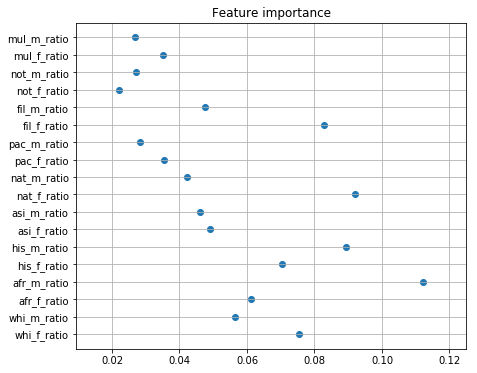

In [84]:
importances = fitted_models['rf'].best_estimator_.steps[1][1].feature_importances_
for feat, importance in zip(X.columns, importances):
    print(feat, importance)
plt.scatter(importances, X.columns,)
fig_size = [7,6]
plt.rcParams["figure.figsize"] = fig_size
plt.title('Feature importance')
plt.grid()
plt.show()

#### Looking at R^2 score, MAE, and RMSE to determine best model

In [85]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print( 'RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

lasso
--------
R^2: 0.271432828794
MAE: 14.8484118615
RMSE: 18.7752634178
ridge
--------
R^2: 0.273029797925
MAE: 14.7109539274
RMSE: 18.7546750865
enet
--------
R^2: 0.271626345643
MAE: 14.9298097266
RMSE: 18.772769776
rf
--------
R^2: 0.456155288545
MAE: 12.1331583333
RMSE: 16.2214134824
gb
--------
R^2: 0.41821965614
MAE: 12.1584486258
RMSE: 16.7776357618
drm
--------
R^2: -0.00727618905856
MAE: 18.5025246844
RMSE: 22.0762611884
drq
--------
R^2: -0.103225930947
MAE: 17.3176767677
RMSE: 23.1038028703


## Choosing the RandomForestRegressor model

In [60]:
rf_pred = fitted_models['rf'].predict(X_test)

#### Making scatter plot and distribution plot of predected versus actual graduation rate

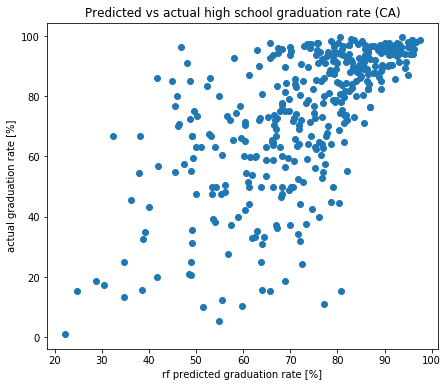

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


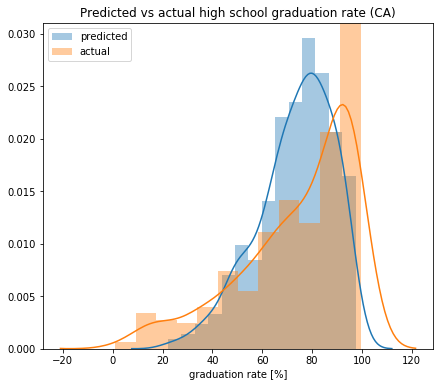

In [61]:
plt.scatter(rf_pred, y_test)
plt.xlabel('rf predicted graduation rate [%]')
plt.ylabel('actual graduation rate [%]')
plt.title('Predicted vs actual high school graduation rate (CA)')
plt.show()
sns.distplot(rf_pred, label= "predicted")
sns.distplot(y_test, label= "actual")
plt.xlabel('graduation rate [%]')
plt.title('Predicted vs actual high school graduation rate (CA)')
plt.legend()
plt.show()

#### Plotting distribution of actual error in prediction

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


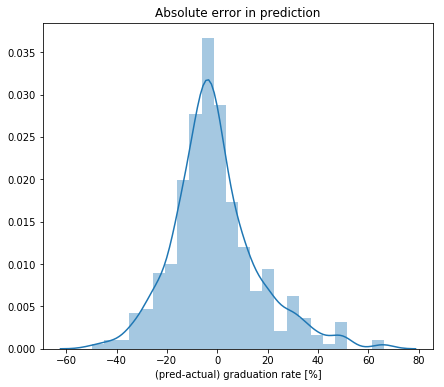

In [62]:
sns.distplot(rf_pred-y_test)
plt.xlabel('(pred-actual) graduation rate [%]')
plt.title('Absolute error in prediction')
plt.show()

### How does this result compare to a blind guess at the average or the median?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


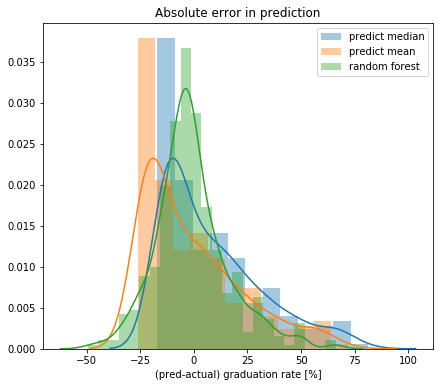

In [63]:
# Predict test set using dummy models
drm_pred = fitted_models['drm'].predict(X_test)
drq_pred = fitted_models['drq'].predict(X_test)
sns.distplot(drq_pred-y_test, label= "predict median")
sns.distplot(drm_pred-y_test, label= "predict mean")
sns.distplot(rf_pred-y_test, label= "random forest")
plt.xlabel('(pred-actual) graduation rate [%]')
plt.title('Absolute error in prediction')
plt.legend()

In [66]:
with open('CA_gradrate_model.pkl', 'wb') as f:
    pkl.dump(fitted_models['rf'].best_estimator_, f)